In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
datainfo=pd.read_csv("lending_club_info.csv",index_col='LoanStatNew')

In [148]:
datainfo

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [149]:
df=pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [150]:
df.shape

(396030, 27)

In [151]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [152]:
df.loan_status.value_counts()
#hence classsification problem

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [153]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [154]:
#lets check these columns one by one
df.title
df.title.value_counts()
#since it has about 50k different values(which is about 13%) we will consider it as a categorial feature 
#so title is important feature for our prediction\

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [155]:
df.emp_title.value_counts()
#so its difficult to decide whether emp_title should be taken as categorical feature or not
#since it has more than 170k different values(which is about 50%) we wont consider it as a feature 

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [156]:
df.emp_length.value_counts()
#this is a good categorical feature, we can also consider it as a continuous feature
#but lets consider it as categorical for now

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [157]:
df.revol_util.value_counts()
#this is a continuos feature
#we can make it categorical using binning to more generalise the model

0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: revol_util, Length: 1226, dtype: int64

In [158]:
df.mort_acc
#its value ranges from 0 to 34, its a good continous feature

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [159]:
df.pub_rec_bankruptcies.value_counts()
#its a good continous feature

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [160]:
#revol_util and pub_rec_bankruptcies has very few rows missing. we have options-
#1.so we should drop all rows where these two are nulls
#2.we can fill pub_rec_bankruptcies missing values with 0, because most of the values there are 0
#3.we can fill revol_util with mean or something which going to be quite difficult to figure out

#so heres my take
#lets fill null values in pub_rec_bankruptcies with 0

In [161]:
df.pub_rec_bankruptcies=df.pub_rec_bankruptcies.fillna(0)

In [162]:
#lets check for null values in pub_rec_bankruptcies
df.pub_rec_bankruptcies.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Name: pub_rec_bankruptcies, Length: 396030, dtype: bool

<AxesSubplot:xlabel='revol_util'>

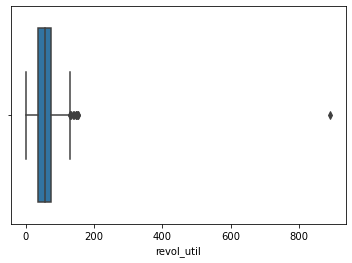

In [163]:
#lets make a boxplot of revol_util to see what we should fill in that column
sns.boxplot(x=df.revol_util)

In [164]:
#lets fill null values in revol_util with median
median=df.revol_util.median()
df.revol_util=df.revol_util.fillna(median)

In [165]:
df.revol_util.isnull().sum()

0

In [166]:
#sns.barplot(y=df.title.value_counts())
#titleseries=df.title.value_counts()
#print(len(titleseries))
#titledf=pd.DataFrame({'title':titleseries.index, 'count':titleseries.values})
#sns.barplot(x='title',y='count',data=titledf)

In [167]:
#major value is Debt consolidation in title column, so lets fill it with this
df.title=df.title.fillna('Debt consolidation')

In [168]:
df.title.isnull().sum()

0

In [169]:
#for emp_title we can either drop the column, or create a new variable out of it
df.drop(columns=['emp_title'],axis=1,inplace=True)

In [170]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [171]:
#lets convert emp length to an ordinal column rather than categorical
#we have o make custom encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#df.emp_length = encoder.fit_transform(df.emp_length)
#df.emp_length.value_counts()
def customencoder(emplength):
    if(emplength==None):
        return emplength
    emplength=str(emplength)
    if("10+" in emplength):
        return 10.0
    elif("<" in emplength):
        return 0.0
    elif("1" in emplength):
        return 1.0
    elif("2" in emplength):
        return 2.0
    elif("3" in emplength):
        return 3.0
    elif("4" in emplength):
        return 4.0
    elif("5" in emplength):
        return 5.0
    elif("6" in emplength):
        return 6.0
    elif("7" in emplength):
        return 7.0
    elif("8" in emplength):
        return 8.0
    elif("9" in emplength):
        return 9.0
df.emp_length=df.emp_length.apply(customencoder)

In [174]:
df.emp_length.value_counts()

10.0    126041
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: emp_length, dtype: int64

In [175]:
#now fill null values with median
df.emp_length=df.emp_length.fillna(df.emp_length.median())
df.emp_length.isnull().sum()

0

In [179]:
df.mort_acc.value_counts()
#so we have two choices for mort_acc
#either draw boxplot and look for outliers and take decision, or fill it with 0 i.e. major value

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

<AxesSubplot:xlabel='mort_acc'>

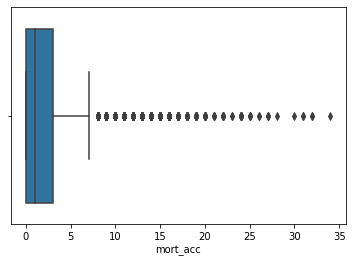

In [180]:
sns.boxplot(x=df.mort_acc)
#so there is lot of outliers, we can fill nulls with median

In [181]:
df.mort_acc=df.mort_acc.fillna(df.mort_acc.median())

In [ ]:
df.mort_acc.isnull().sum